In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [18]:
data = load_iris()

In [19]:
X = data.data
y = data.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [21]:
clf = DecisionTreeClassifier(random_state=42)

In [22]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
y_predict = clf.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test,y_predict)

In [25]:
print(accuracy)

1.0


In [26]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {
    "max_depth":range(1,10,1),
    "min_samples_leaf":range(1,20,2),
    "min_samples_split":range(2,20,2),
    "criterion":["entropy","gini"]
}

In [29]:
tree = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5,
    verbose=True,
)

In [30]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2)},
             verbose=True)

In [31]:
print("best accuracy: ", grid_search.best_score_)

best accuracy:  0.9428571428571428


In [32]:
print("best estimator: ", grid_search.best_estimator_)

best estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=1)


In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

In [34]:
tree_clf = grid_search.best_estimator_

[Text(0.375, 0.9, 'petal width (cm) <= 0.8\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]\nclass = versicolor'),
 Text(0.25, 0.7, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.8, 'True  '),
 Text(0.5, 0.7, 'petal length (cm) <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]\nclass = versicolor'),
 Text(0.4375, 0.8, '  False'),
 Text(0.25, 0.5, 'petal width (cm) <= 1.45\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]\nclass = versicolor'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 28\nvalue = [0, 28, 0]\nclass = versicolor'),
 Text(0.375, 0.3, 'entropy = 0.722\nsamples = 5\nvalue = [0, 4, 1]\nclass = versicolor'),
 Text(0.75, 0.5, 'petal length (cm) <= 5.15\nentropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]\nclass = virginica'),
 Text(0.625, 0.3, 'petal width (cm) <= 1.75\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]\nclass = virginica'),
 Text(0.5, 0.1, 'entropy = 0.918\nsamples = 6\nvalue = [0, 4, 2]\nclass = versicolor'),


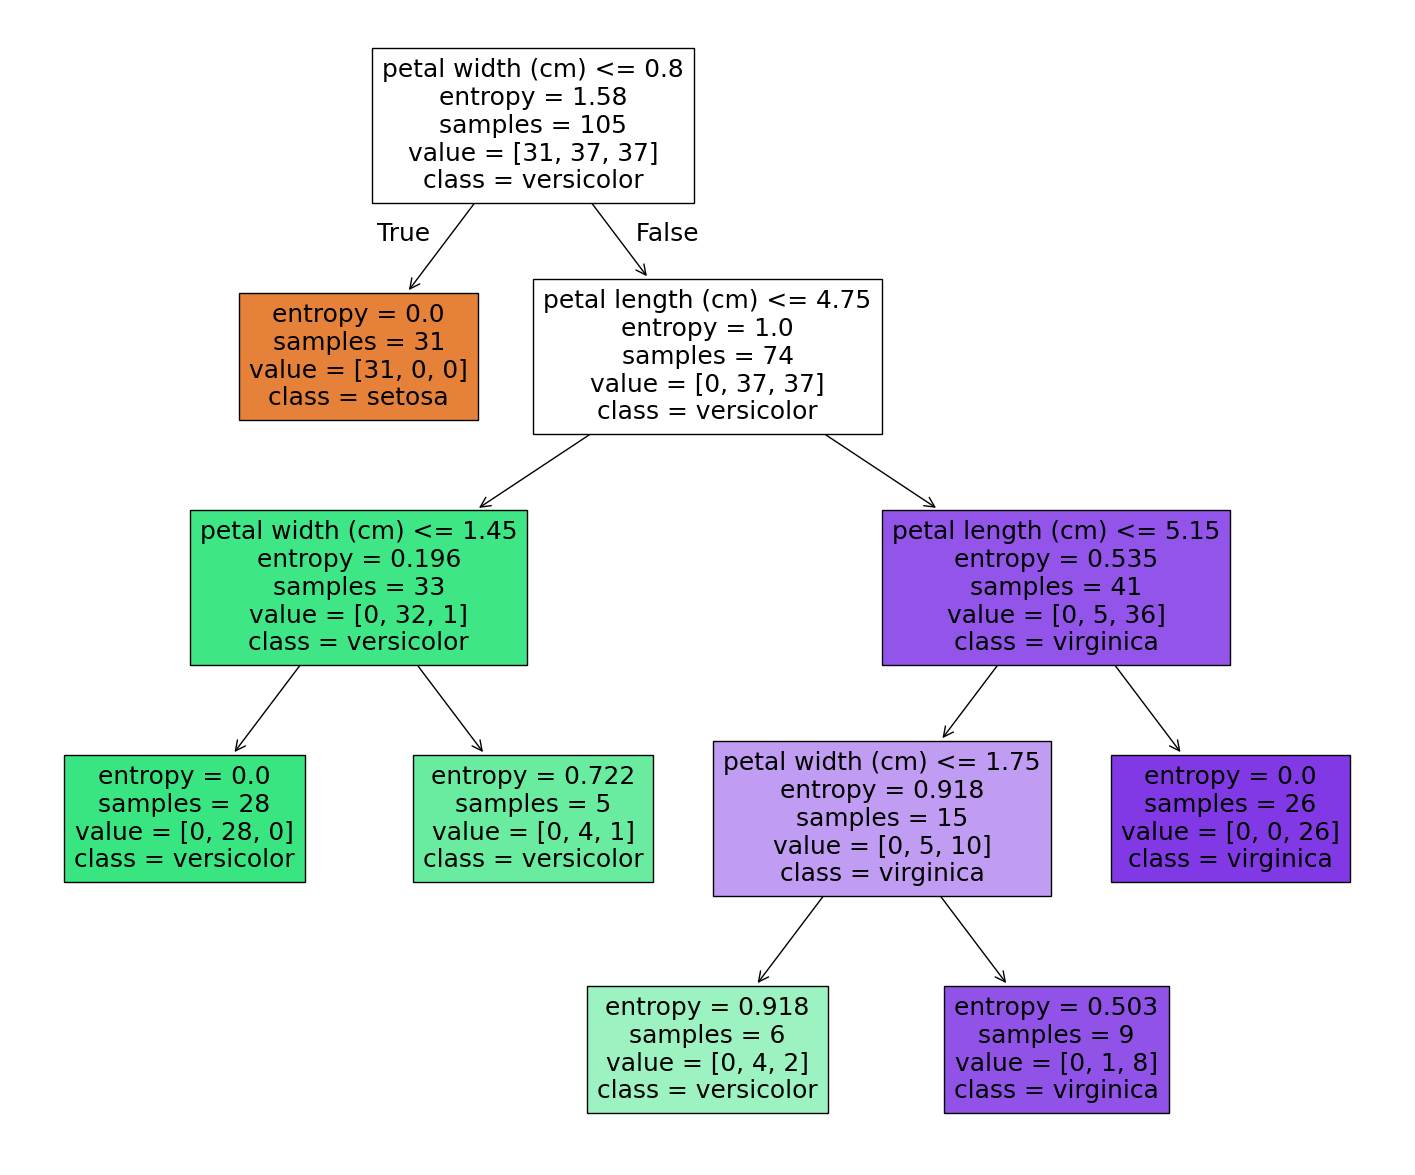

In [40]:
plt.figure(figsize=(18,15))
plot_tree(tree_clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)